Polynomial Regression is a type of regression analysis in which the relationship between the independent variable xx and the dependent variable yy is modeled as an nth-degree polynomial.

While it may seem like a non-linear model, it is still considered a type of linear regression because the model is linear in the parameters (coefficients), not in the variables.

The general form of a polynomial regression equation of degree nn is:
y=β0+β1x+β2x2+β3x3+⋯+βnxn+ϵ
y=β0​+β1​x+β2​x2+β3​x3+⋯+βn​xn+ϵ

Where:

    yy = dependent variable

    xx = independent variable

    β0,β1,...,βnβ0​,β1​,...,βn​ = regression coefficients

    ϵϵ = error term

Polynomial regression is used when data shows a curved or non-linear trend, which cannot be captured by simple linear regression.

For example, data may have:

    U-shaped or inverted U-shaped relationships

    Curvilinear trends in growth, pricing, or natural processes

Degree of the Polynomial

    Degree 1 → Linear regression

    Degree 2 → Quadratic regression

    Degree 3 → Cubic regression

    Higher degrees → More complex curves

Note: Increasing the degree increases the model’s flexibility but also the risk of overfitting.

 Overfitting and Underfitting

    Underfitting: Degree too low; model is too simple and misses important patterns.

    Overfitting: Degree too high; model fits the training data too closely and performs poorly on new data.

This is known as the bias-variance tradeoff:

    High bias → Underfitting

    High variance → Overfitting

Model Assumptions

Polynomial regression shares assumptions with linear regression:

    Linearity in parameters (not necessarily in variables)

    Independence of errors

    Homoscedasticity (constant variance of errors)

    Normality of errors

 Model Building Process (Conceptually)

    Transform original features into polynomial features x2,x3,...,xnx2,x3,...,xn

    Fit a linear regression model on these transformed features

    Interpret results and validate performance using metrics like:

        Mean Squared Error (MSE)

        Root Mean Squared Error (RMSE)

        Coefficient of Determination (R2R2)

Feature Engineering

Transforming features manually (e.g., x2x2, x3x3) is a part of feature engineering, which increases the capacity of the model to capture non-linearity in the data.


🔐 Regularization in Polynomial Regression

When higher-degree polynomial models overfit:

    Use Ridge Regression (L2 penalty) to shrink coefficients

    Use Lasso Regression (L1 penalty) to shrink or eliminate coefficients

These methods help control model complexity.
🧪 Real-World Applications

    Modeling growth of populations or investments

    Predicting prices (e.g., of cars, houses)

    Engineering measurements (stress-strain curves)

    Environmental data analysis (e.g., pollution trends)

📎 Advantages

    Captures non-linear trends

    Easy to implement

    Flexible with choice of degree

🧱 Disadvantages

    Sensitive to outliers

    Overfitting with high degree polynomials

    Poor extrapolation beyond the range of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
x= 6 * np.random.rand(100, 1) -3
y = 0.5 * x **2 + 1.5*x +2 + np.random.rand(100,1)

# Quadratic eqn used --> y = 0.5x^2+1.5*x+2+outliers

Text(0, 0.5, 'Y Dataset')

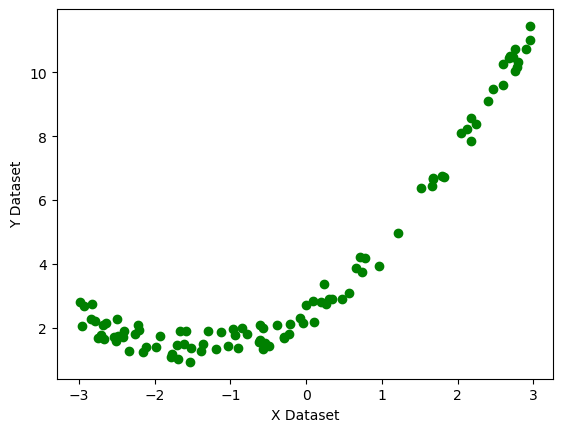

In [3]:
plt.scatter(x,y,color="g")
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)

In [8]:
## lets try to implement simple linear regression

from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [9]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=regression_1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
## r2 score on test data
score = r2_score(y_test,y_pred)

In [12]:
print(score)

0.8121517775327152


In [ ]:
## r2 score on training data 

r2_score(y_train,regression_1.predict(X_train))

0.7425414561529236

Text(0, 0.5, 'Y Dataset')

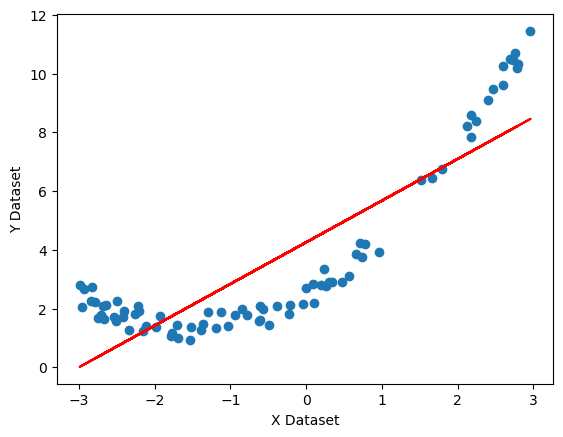

In [15]:
# lets visualize the model

plt.plot(X_train,regression_1.predict(X_train),color="r")
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [ ]:
## Lets implement polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [20]:
X_train_poly=poly.fit_transform(X_train)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

# we did not transform y because y is oour predicted output and we never try to transform it we only can do is separate it into train test split 


In [19]:
X_train_poly

array([[ 1.00000000e+00, -5.64882356e-01,  3.19092076e-01],
       [ 1.00000000e+00, -9.45363368e-01,  8.93711898e-01],
       [ 1.00000000e+00, -1.36388441e+00,  1.86018067e+00],
       [ 1.00000000e+00, -2.99328069e+00,  8.95972929e+00],
       [ 1.00000000e+00, -2.93074065e+00,  8.58924079e+00],
       [ 1.00000000e+00, -2.34369072e+00,  5.49288618e+00],
       [ 1.00000000e+00, -2.53972838e+00,  6.45022026e+00],
       [ 1.00000000e+00,  9.57730098e-02,  9.17246941e-03],
       [ 1.00000000e+00, -6.98991260e-03,  4.88588782e-05],
       [ 1.00000000e+00,  7.11066111e-01,  5.05615015e-01],
       [ 1.00000000e+00, -7.76881166e-01,  6.03544346e-01],
       [ 1.00000000e+00, -1.03478798e+00,  1.07078616e+00],
       [ 1.00000000e+00,  2.78585871e+00,  7.76100878e+00],
       [ 1.00000000e+00,  1.92797245e-01,  3.71707776e-02],
       [ 1.00000000e+00,  2.79501378e+00,  7.81210201e+00],
       [ 1.00000000e+00, -4.90298733e-01,  2.40392848e-01],
       [ 1.00000000e+00, -2.21133111e+00

In [21]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [22]:
y_pred_poly=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred_poly)

In [24]:
print(score) # score is improved

0.9906709927156884


In [25]:
print(regression.coef_)

[[0.         1.52164365 0.50695387]]


it gives 3 slope coef because we have three features in this polynomial regression

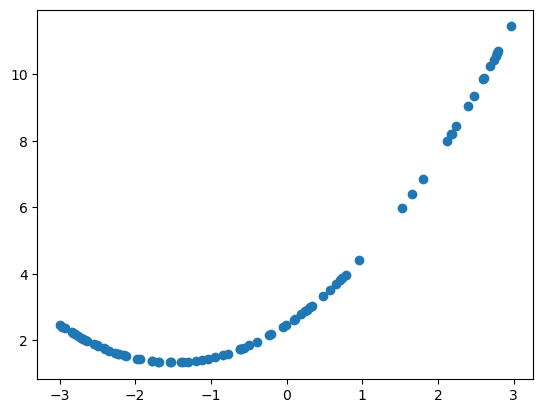

In [26]:
plt.scatter(X_train,regression.predict(X_train_poly))

## Pipeline


A pipeline in machine learning is a way to bundle multiple preprocessing steps and a model into a single object. This allows you to automate the workflow — from transforming data to training the model — in a clean and structured manner.
🔄 In Polynomial Regression, a pipeline typically includes:

    Polynomial feature transformation

    Model training (usually linear regression)

    (Optional) Scaling or regularization




🧠 Why Use a Pipeline?

    ✅ Keeps code clean and organized

    ✅ Prevents data leakage

    ✅ Helps in cross-validation and grid search

    ✅ Reproducibility and consistency

Pipeline in polynomial regression = preprocessing + regression packed together.

Helps build clean, efficient, and error-free models.

Extremely useful for production deployment and scaling experiments.

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
def poly_regression(degree):
    # Step 1: Generate evenly spaced values between -3 and 3 (for smooth curve plotting)
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)  # shape: (200, 1)

    # Step 2: Create polynomial features of specified degree
    # include_bias=True adds the intercept term (x^0 = 1) in the features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)

    # Step 3: Initialize linear regression model
    lin_reg = LinearRegression()

    # Step 4: Create a pipeline that first generates polynomial features, then fits linear regression
    poly_regression = Pipeline([
        ("poly_features", poly_features),  # Transform input data to polynomial form
        ("lin_reg", lin_reg)               # Fit linear regression to transformed data
    ])

    # Step 5: Fit the pipeline model using training data (must be defined outside this function)
    poly_regression.fit(X_train, y_train)

    # Step 6: Predict values using the trained model on new data (X_new)
    y_pred_new = poly_regression.predict(X_new)

    # Step 7: Plot the predicted polynomial regression curve
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}", linewidth=2)  # Red prediction line

    # Step 8: Plot the original training data points in blue
    plt.plot(X_train, y_train, "b.", linewidth=3)

    # Step 9: Plot the original test data points in green
    plt.plot(X_test, y_test, "g.", linewidth=3)

    # Step 10: Add legend and labels
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    
    # Step 11: Set the axis limits for better visualization
    plt.axis([-4, 4, 0, 10])

    # Step 12: Display the final plot
    plt.show()


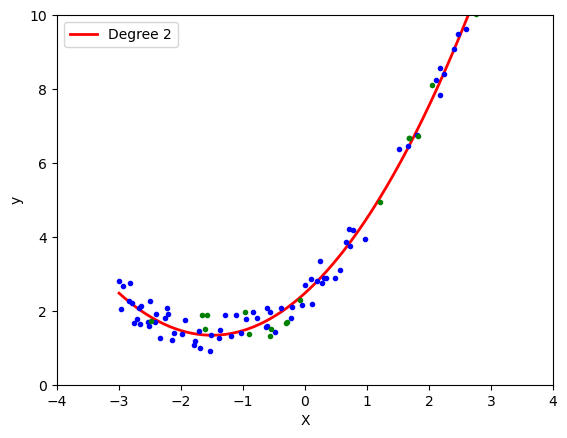

In [29]:
poly_regression(2)

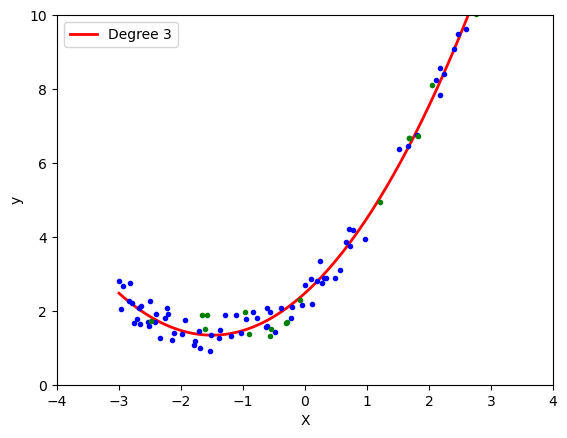

In [33]:
poly_regression(3)